## HR Analytics Job By Classification Algorithms 

In [2]:
# Imports
print ("importing........", flush=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# sns.set_theme(style="ticks", color_codes=True)
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression # LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score # k-fold cross-validation.... 
# 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
# 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, make_scorer #......
from sklearn.metrics import roc_auc_score , classification_report
from sklearn.metrics import confusion_matrix
#
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier 
#import xgboost as xgb
#from xgboost import plot_importance
from matplotlib.colors import ListedColormap
plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
# Pallets used for visualizations
color= "Spectral"
color_sns= sns.color_palette(color)
color_plt = ListedColormap(sns.color_palette(color).as_hex())
color_hist = 'teal'
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import AdaBoostClassifier

print("[Done]")

importing........



Bad key text.latex.preview in file C:\Users\hp\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\hp\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\hp\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You probably need 

[Done]


In [3]:
# Helper Functions
def model_eval(mdl_local, X_local, y_local, bta = 1):
    y_pred = mdl_local.predict(X_local)
    print(f"F({bta}):", fbeta_score(y_local, y_pred, beta= bta))
    print("Precision :", precision_score(y_local, y_pred))
    print("Recall :", recall_score(y_local, y_pred))

def make_confusion_matrix(mdl_local, X_local, y_local, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (mdl_local.predict_proba(X_local)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_local, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['stay_job', 'Leave_job'],
           yticklabels=['stay_job', 'Leave_job']);
    plt.xlabel('prediction')
    plt.ylabel('actual')
    
def make_class_report(mdl_local, X_local, y_local, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (mdl_local.predict_proba(X_local)[:, 1] >= threshold)
    print(classification_report(y_local, y_predict))
    

In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 30C4-47D2

 Directory of C:\Users\hp\Desktop\DataScience Python T5\MY Project\Project 3\Dataset

2022-01-08  05:17 PM    <DIR>          .
2022-01-08  05:17 PM    <DIR>          ..
2021-12-24  08:49 PM    <DIR>          .ipynb_checkpoints
2021-12-16  12:43 PM           210,504 aug_test.csv
2020-12-07  12:25 AM         1,961,145 aug_train.csv
2021-12-16  12:48 PM           265,615 aug_train.csv.zip
2022-01-08  05:17 PM         2,888,476 HR Analytics Job By Classification Algorithms.ipynb
2022-01-08  03:53 PM           118,427 hr.jpg
2021-12-18  06:31 PM            28,462 HR_Analytics_Job_Change_of_Data_Scientists22.ipynb
2021-12-18  08:00 PM           544,662 Join train-set & test-set.ipynb
2021-12-21  08:42 PM             3,522 Naive Bayes.txt
2021-12-16  12:48 PM            20,612 sample_submission.csv
2021-12-18  07:35 PM         1,656,818 trainset & testset.ipynb
2021-12-24  02:25 PM         2,511,216 trainset.ipynb
2021-12-21

In [5]:
BOLD = '\033[1m'
END = '\033[0m'
kfold=5

### Classification project steps
- Imports
- Read
- Formatting
- Feature engineerning  
- Drop noneeded columns
- Create x, y.
- Biild our faeteres list for cat. & numeric.
- Dummy variabiles and label encoder.
- Split the data.
- Baseline model with data numerical cols(expr0).
- fill with median instead
- Expr1:with all the data (dummy included).
- Expr2: with scaling (standard scaler).
- Expr3: with grid search.

### Reading & Formatting  

### Read train-set

In [6]:
df_train = pd.read_csv('aug_train.csv')
df_train.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0


In [7]:
df_train.shape

(19158, 14)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [9]:
df_train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,NaN,NaN,NaN,16875.358179,9616.292592,1.0,8554.25,16982.5,25169.75,33380.0
city,19158,123,city_103,4355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_development_index,19158.0,NaN,NaN,NaN,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
gender,14650,3,Male,13221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relevent_experience,19158,2,Has relevent experience,13792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enrolled_university,18772,3,no_enrollment,13817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_level,18698,5,Graduate,11598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
major_discipline,16345,6,STEM,14492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
experience,19093,22,>20,3286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_size,13220,8,50-99,3083,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking the Missing Value

In [10]:
df_train.isnull().sum().sort_values(ascending=False)

company_type              6140
company_size              5938
gender                    4508
major_discipline          2813
education_level            460
last_new_job               423
enrolled_university        386
experience                  65
enrollee_id                  0
city                         0
city_development_index       0
relevent_experience          0
training_hours               0
target                       0
dtype: int64

### Check for Duplicates or unnecessary data

In [11]:
# The number of duplicates 
df_train.duplicated(subset=None, keep='first').sum()

0

In [12]:
dataDesc= []

for i in df_train.columns:
    dataDesc.append([
        i, 
        df_train[i].dtypes,
        df_train[i].isna().sum(),
        round((((df_train[i].isna().sum()) / len(df_train)) * 100),2),
        df_train[i].nunique(),
        df_train[i].sample(20).drop_duplicates().values
    ])
pd.DataFrame(dataDesc, columns=[
    "Data features", 
    "Data types",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

,Data features,Data types,Null,Null Percentage,Unique,Unique Sample
0,enrollee_id,int64,0,0.00,19158,"[9009, 2817, 16339, 21484, 26254, 8270, 9331, ..."
1,city,object,0,0.00,123,"[city_13, city_10, city_138, city_36, city_16,..."
2,city_development_index,float64,0,0.00,93,"[0.91, 0.579, 0.92, 0.878, 0.926, 0.698, 0.895..."
3,gender,object,4508,23.53,3,"[Female, Male, nan]"
4,relevent_experience,object,0,0.00,2,"[No relevent experience, Has relevent experience]"
5,enrolled_university,object,386,2.01,3,"[no_enrollment, Full time course, Part time co..."
6,education_level,object,460,2.40,5,"[Masters, Graduate, High School, Primary School]"
7,major_discipline,object,2813,14.68,6,"[STEM, nan, Arts, Other]"
8,experience,object,65,0.34,22,"[>20, 13, 17, 10, 15, 5, 2, 9, 3, 14, 11]"
9,company_size,object,5938,30.99,8,"[5000-9999, 50-99, nan, 10000+, 1000-4999, 100..."


### Data Preprocessing 

In [13]:
########### city ###########
df_train['city'] = df_train['city'].str.replace('city_','')
# Convert city to a number
df_train.city = df_train.city.astype('int32')
######### experience #######
# convert unwanted values such as "<1" and ">20" 
def replacment(experience):
    if experience == '>20':
        return +20
    elif experience == '<1':
        return 0
    else:
        return experience
df_train.experience = df_train.experience.map(replacment)

########## relevent_experience ################
def relevexpe(relevent_experience):
    if relevent_experience == 'Has relevent experience':
        return "Yes"
    elif relevent_experience == 'No relevent experience':
        return "No"
    else:
        return relevent_experience
df_train.relevent_experience = df_train.relevent_experience.map(relevexpe)

########## education_level ############
#full_data.groupby('education_level', 'gender')['target']
#df_grouped = full_data.groupby(['education_level', 'gender']).sort_values(ascending=True)
#df_grouped 

########## last_new_job ############
# full_data['last_new_job'].unique()
# convert unwanted values such as ">4"
def replacement_2(last_new_job):
    if last_new_job == '>4':
        return 5
    elif last_new_job == 'never':
        return 0
    else:
        return last_new_job
df_train.last_new_job = df_train.last_new_job.map(replacement_2)

########## target #################
# convert target values into integer
df_train['target']= df_train['target'].map(lambda x: 1 if x==1.0 else 0)
df_train.target = df_train.target.astype('int32')

In [14]:
df_train.head() 

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,Male,Yes,no_enrollment,Graduate,STEM,20,NaN,NaN,1,36,1
1,29725,40,0.776,Male,No,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0
2,11561,21,0.624,NaN,No,Full time course,Graduate,STEM,5,NaN,NaN,0,83,0
3,33241,115,0.789,NaN,No,NaN,Graduate,Business Degree,0,NaN,Pvt Ltd,0,52,1
4,666,162,0.767,Male,Yes,no_enrollment,Masters,STEM,20,50-99,Funded Startup,4,8,0


### Outliers 

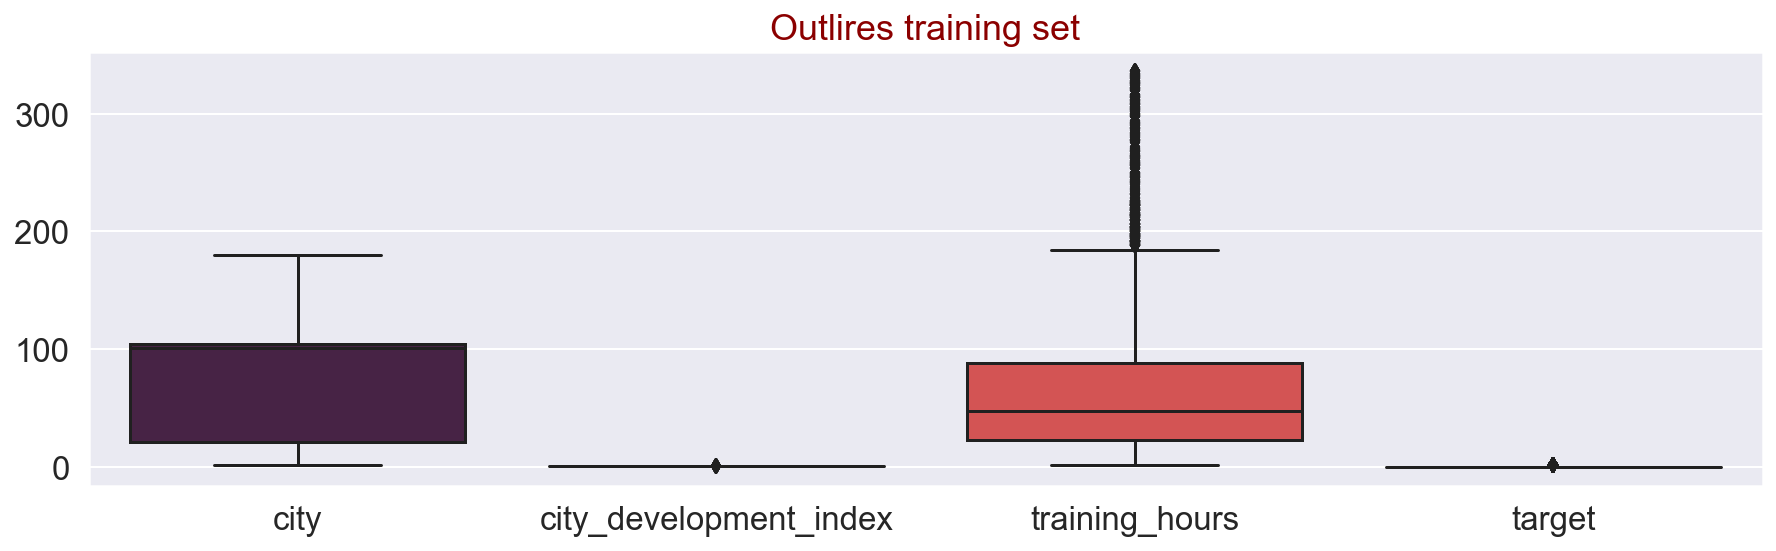

In [15]:
# Using Boxplots to visualize numeric data for check from Outlires value. 
plt.figure(figsize=(15,4))
sns.boxplot(data=df_train[['city', 'city_development_index','gender','relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target']],
            palette= "rocket")
plt.title('Outlires training set', color="darkred", fontsize= 18)
plt.show()

<Figure size 1080x288 with 0 Axes>

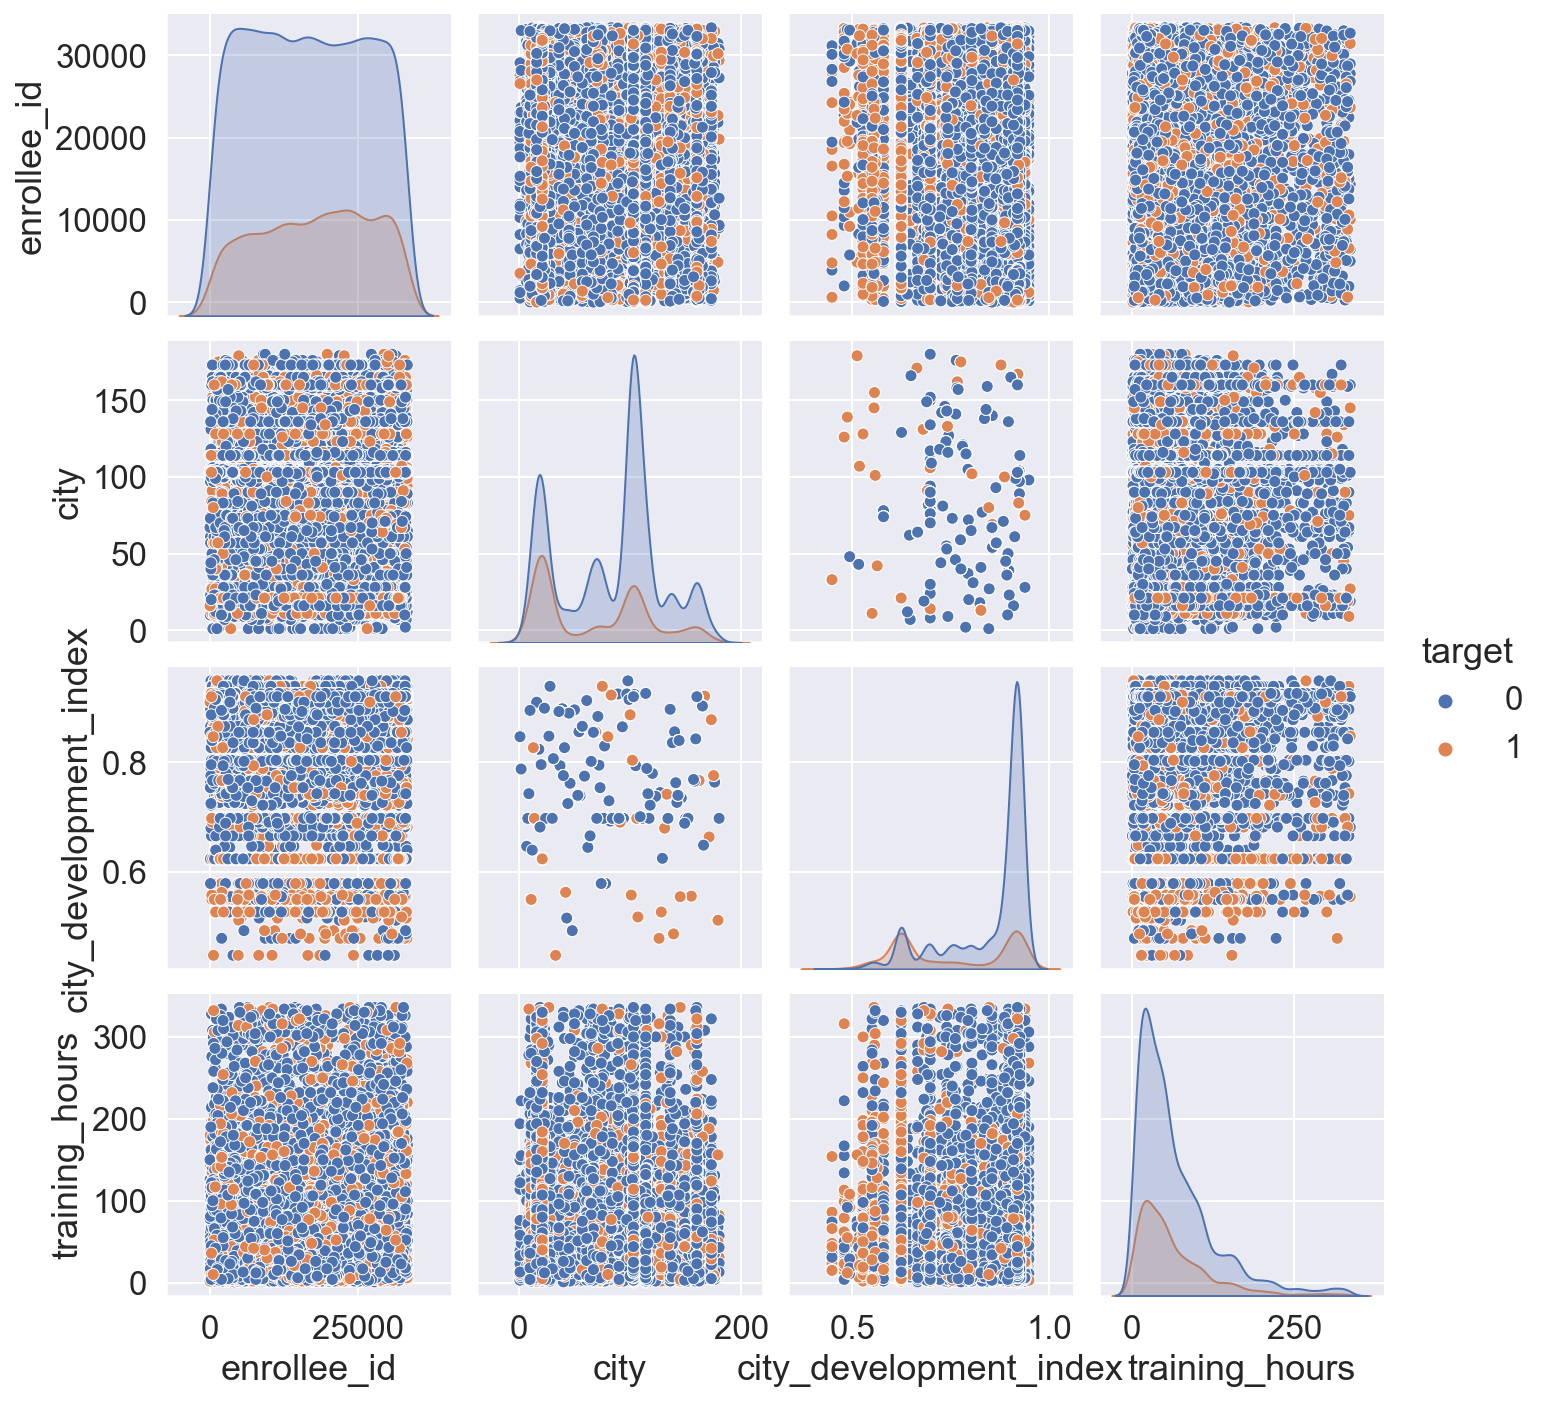

In [15]:
# Check for our data and hue by "target". Is our data linearly separable?
plt.figure(figsize=(15,4))
sns.pairplot(df_train, hue ='target')
plt.show();

### EDA

<Figure size 1080x576 with 0 Axes>

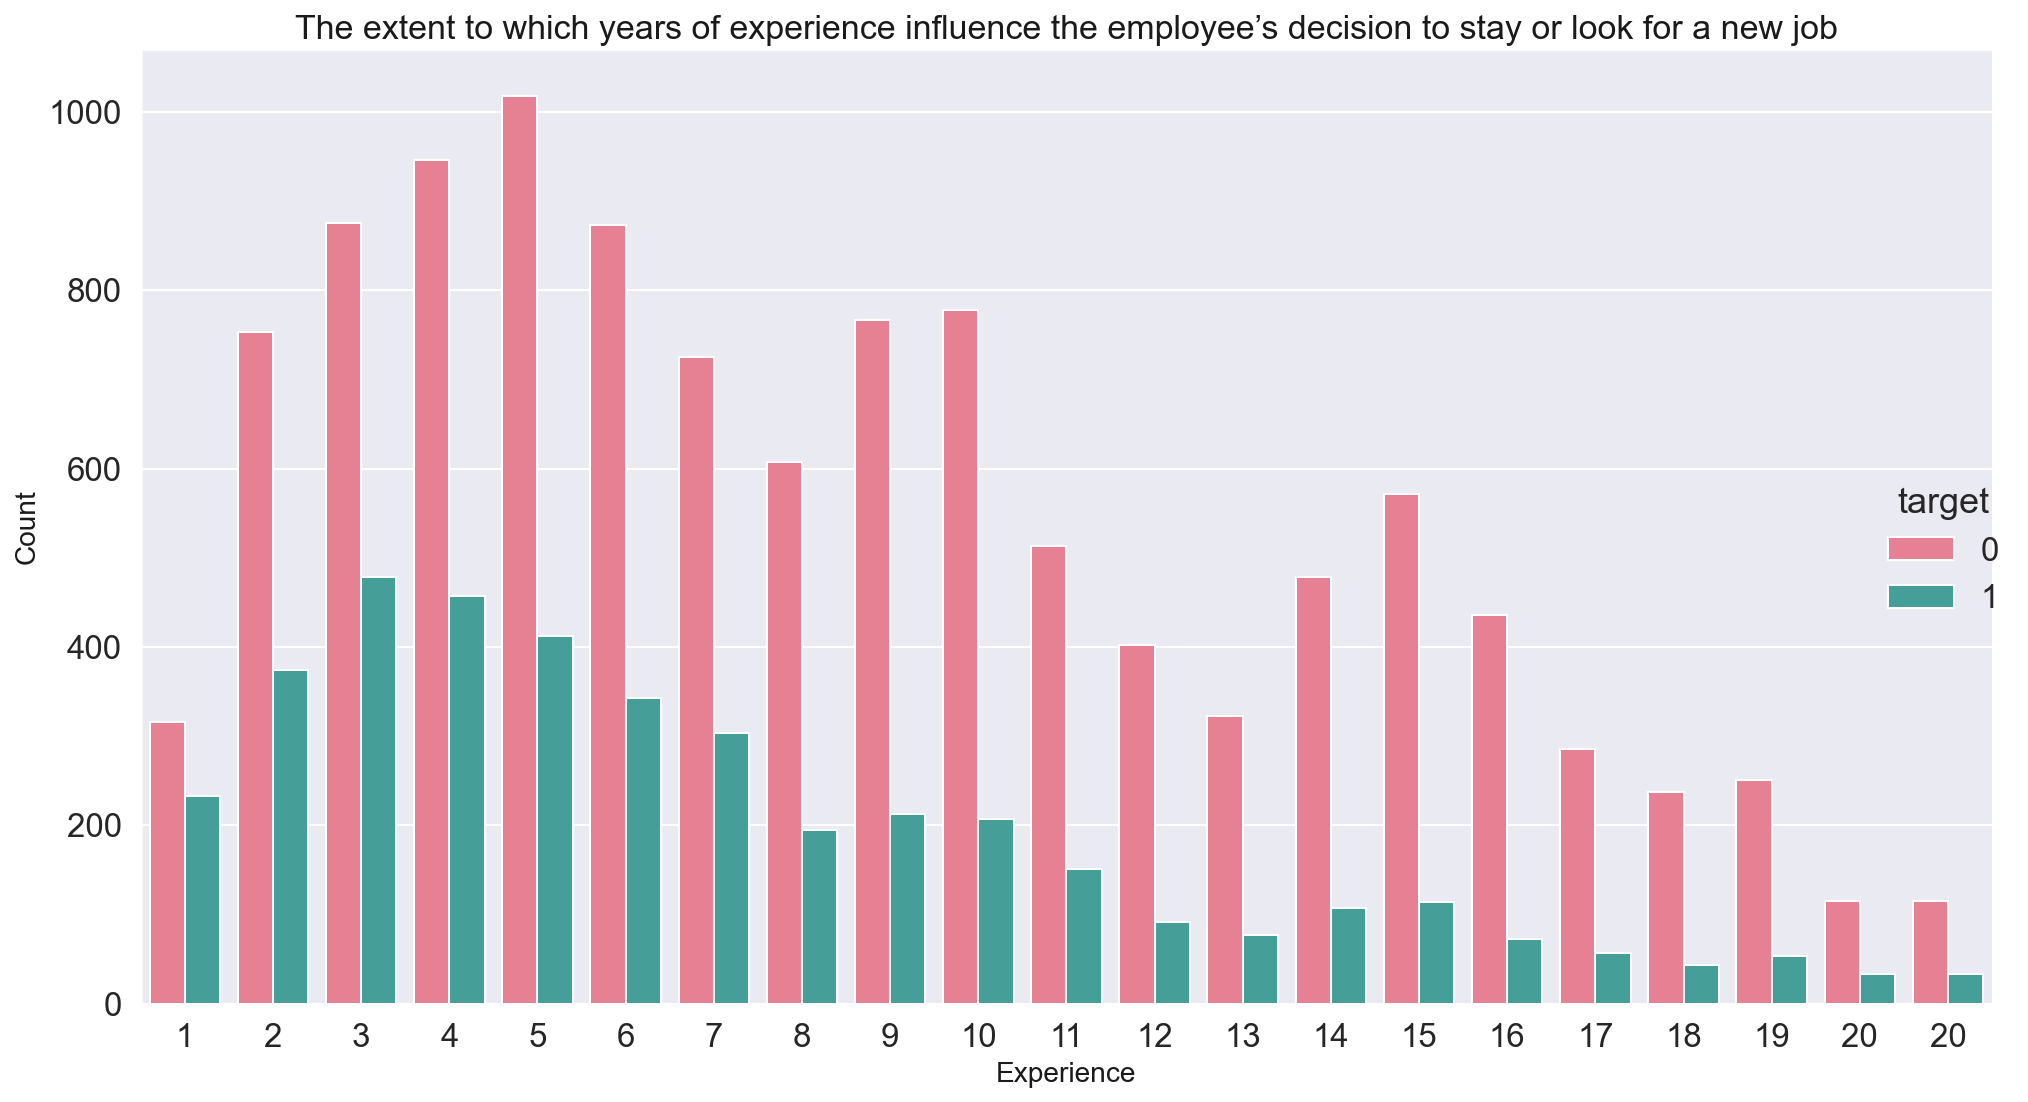

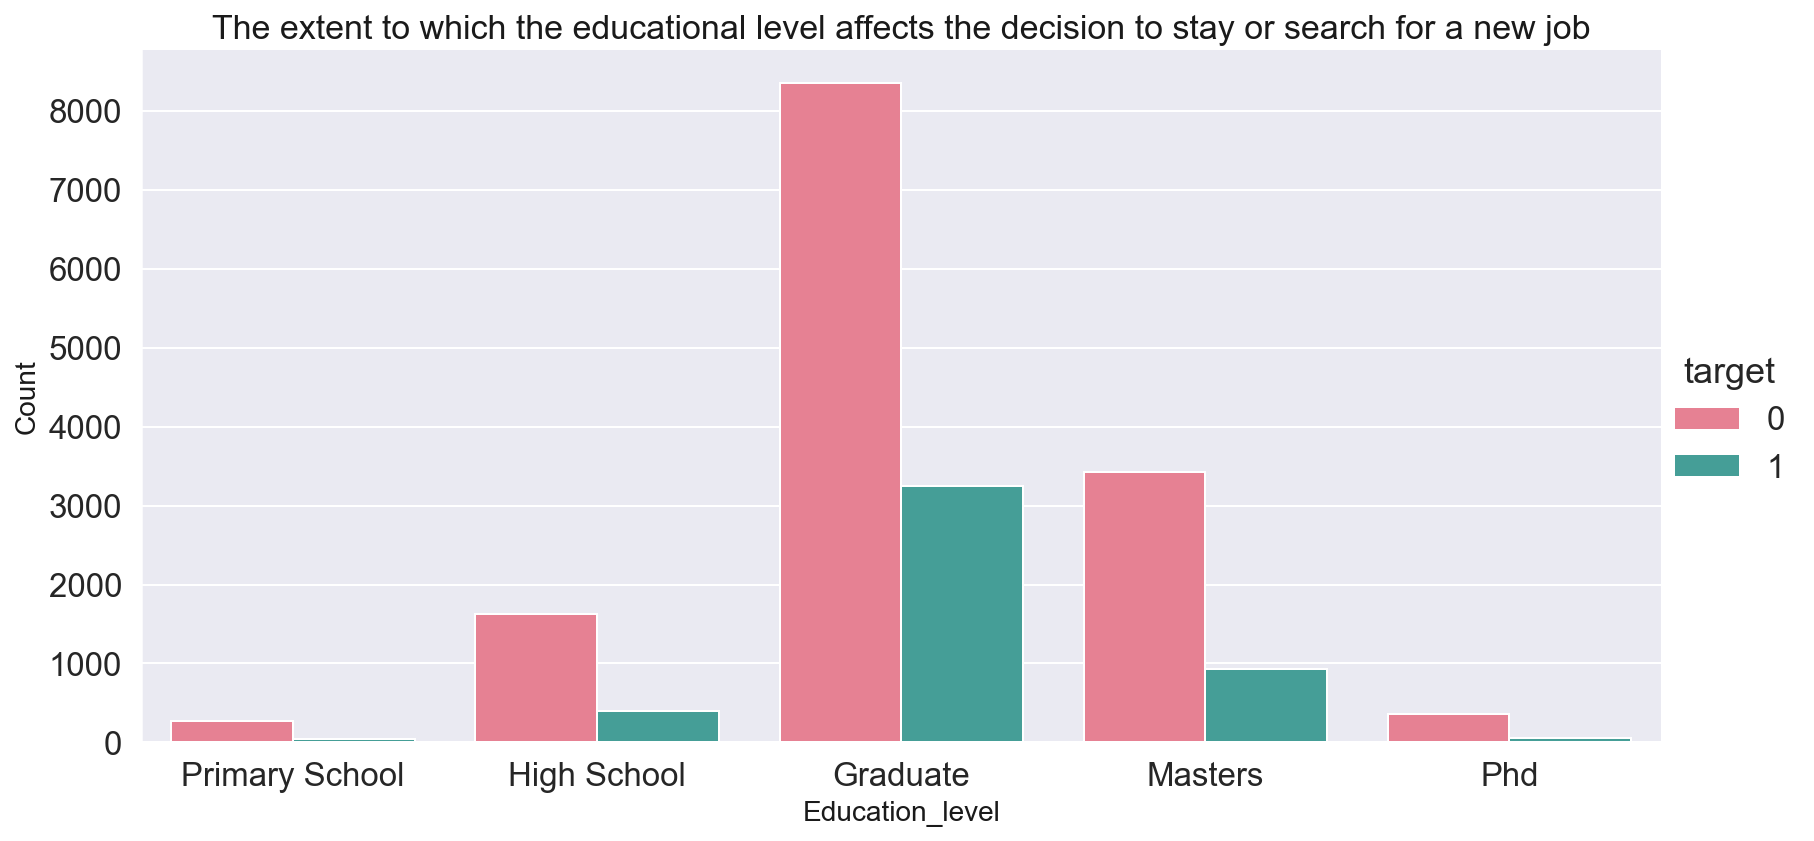

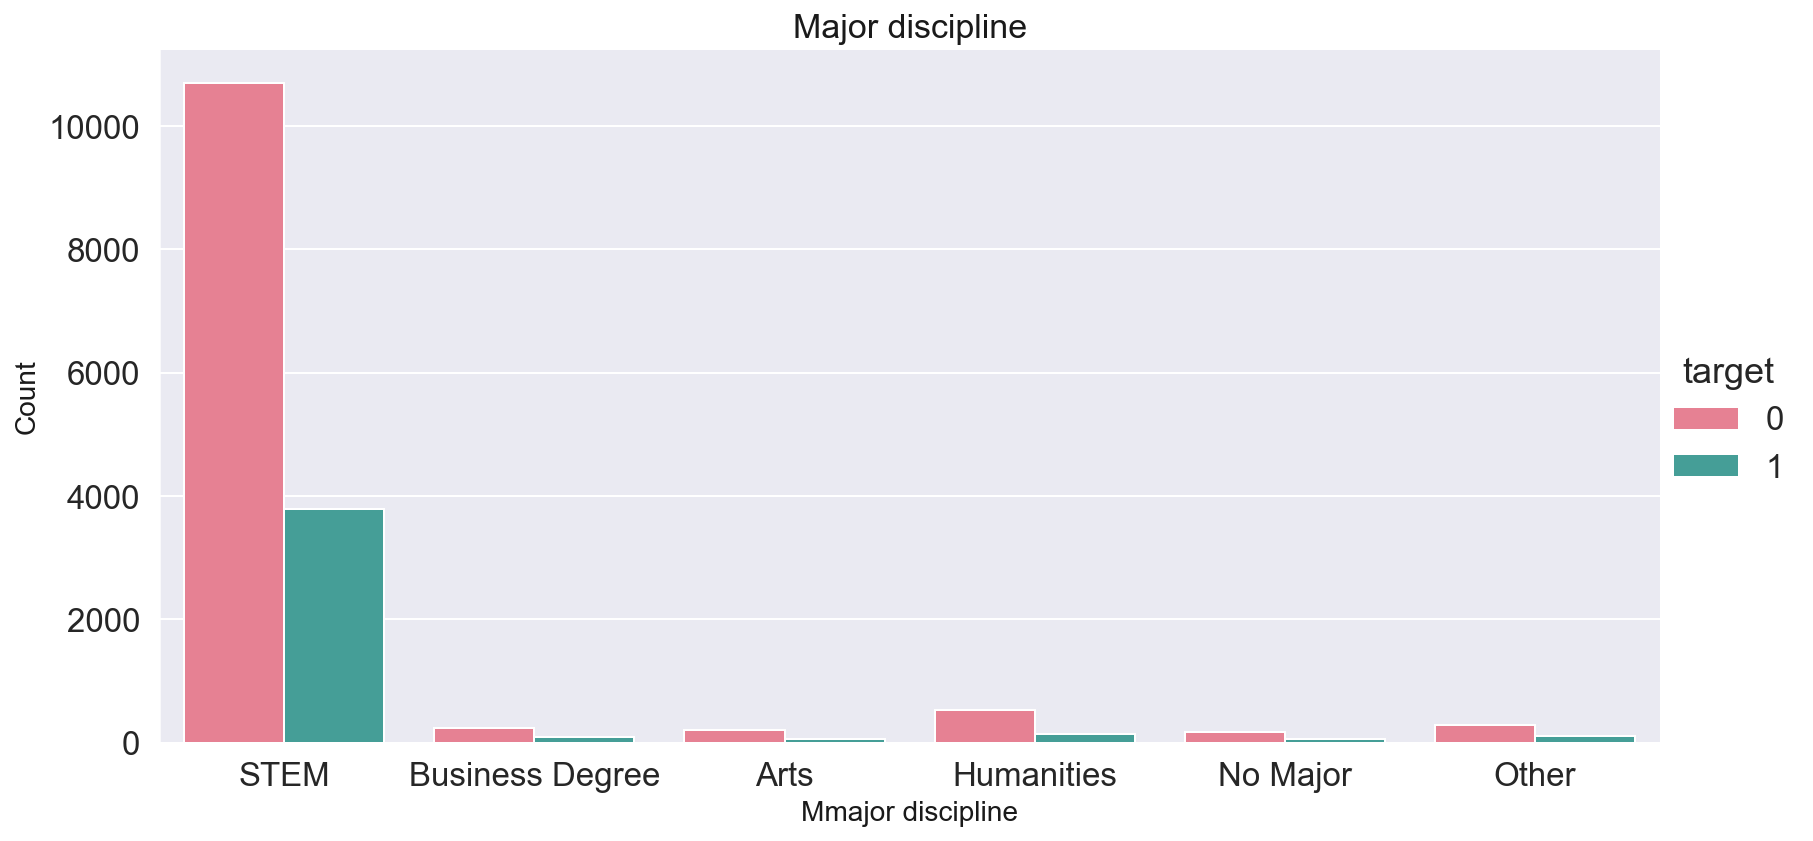

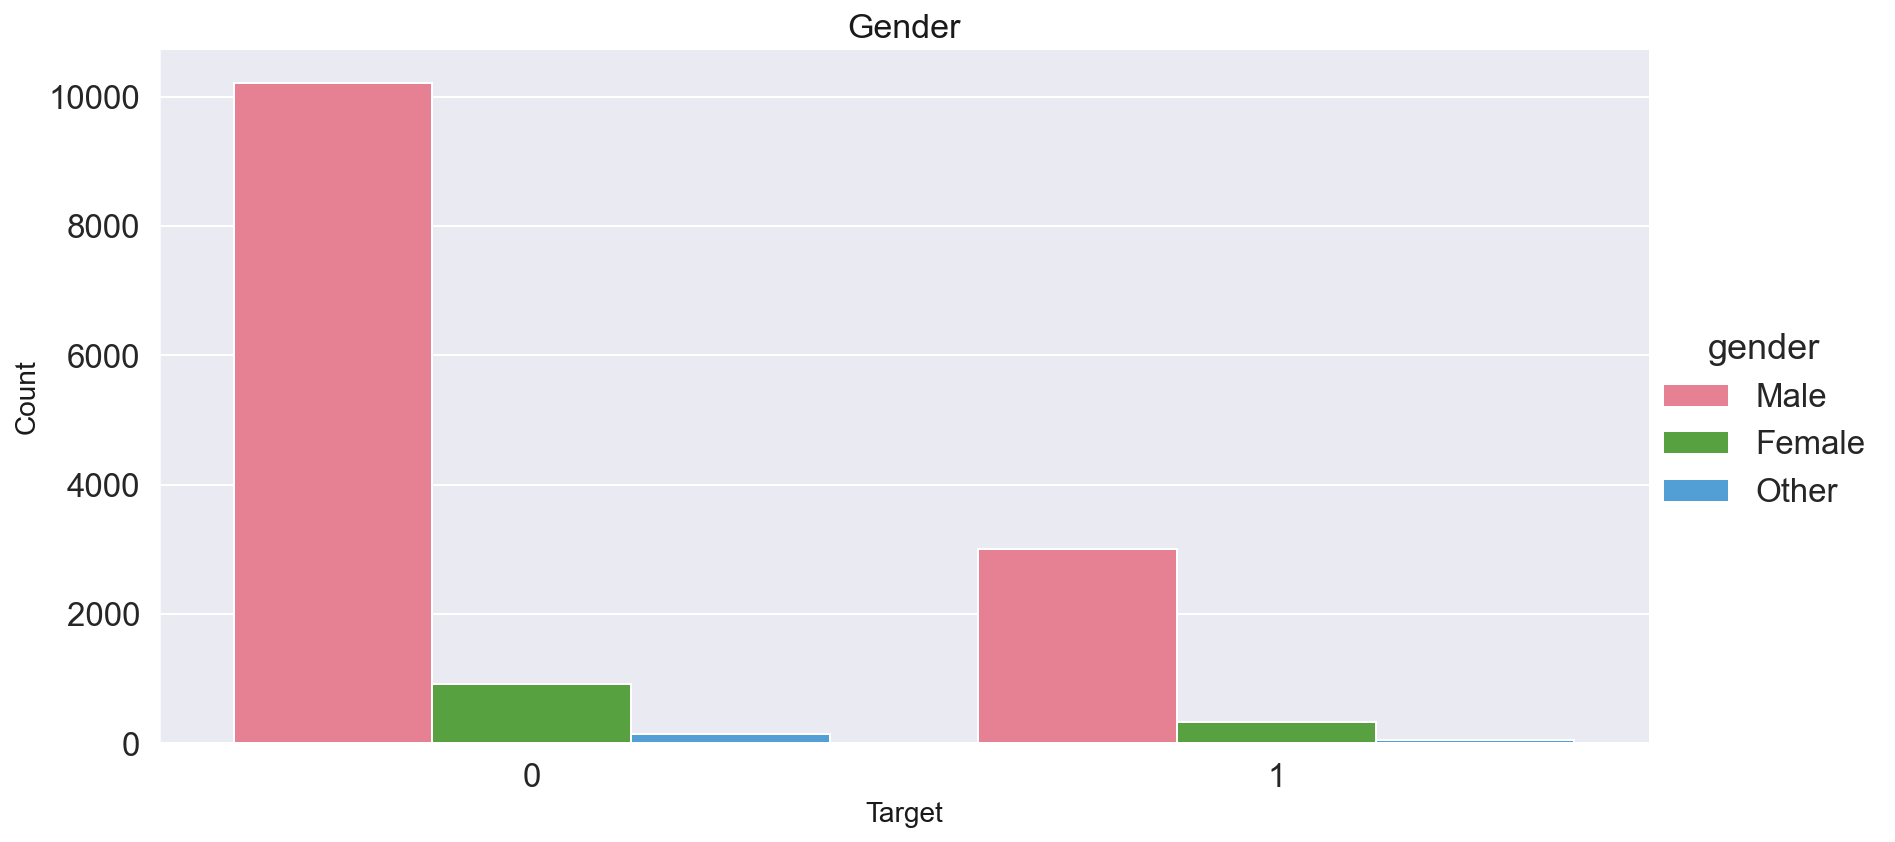

In [16]:
label_dict = {"color":"k","fontsize":14} # x, y 
title_dict = {"color":"k","fontsize":17} # title

fig= plt.figure(figsize=(15,8)).suptitle("Data Spreads",fontsize=22)

sns.catplot(x="experience", kind="count", data=df_train, height=8, aspect=10/6,
            palette="husl", hue='target',
             order= [ '1','2','3','4', '5','6','7','8','9','10', '11','12','13','14','15','16','17','18','19','20','20'] )#, bins=70, ax=ax0)
plt.title('The extent to which years of experience influence the employee’s decision to stay or look for a new job', 
              fontdict=title_dict)
plt.xlabel('Experience', fontdict=label_dict)
plt.ylabel('Count', fontdict=label_dict)
plt.tight_layout()
#####################################
sns.catplot(x="education_level", kind="count", data=df_train, height=6, aspect=2, palette= "husl",
            hue='target',order= ['Primary School','High School','Graduate','Masters','Phd']) # 
plt.title('The extent to which the educational level affects the decision to stay or search for a new job', 
              fontdict=title_dict)
plt.xlabel('Education_level', fontdict=label_dict)
plt.ylabel('Count', fontdict=label_dict);
#############################################
sns.catplot(x="major_discipline", kind="count", data=df_train, height=6, aspect=2, palette= "husl",
            hue='target')
plt.title('Major discipline', 
              fontdict=title_dict)
plt.xlabel('Mmajor discipline', fontdict=label_dict)
plt.ylabel('Count', fontdict=label_dict);
####################################################3
sns.catplot(x="target", kind="count", data=df_train, height=6, aspect=2, palette= "husl", hue="gender")
plt.title('Gender', fontdict=title_dict)
plt.xlabel('Target', fontdict=label_dict)
plt.ylabel('Count', fontdict=label_dict);


In [17]:
df_train.drop(['enrollee_id','city_development_index','company_size', 'company_type'], axis = 1, inplace = True)

In [18]:
# Create x, y
X = df_train.drop('target', axis="columns")
y = df_train["target"]

In [19]:
X.isna().sum().sort_values(ascending=False)

gender                 4508
major_discipline       2813
education_level         460
last_new_job            423
enrolled_university     386
experience               65
city                      0
relevent_experience       0
training_hours            0
dtype: int64

In [20]:
# Biild our faeteres list for cat. & numeric.  
my_list_numeric= X.select_dtypes(include=np.number).columns
my_list_cat = X.select_dtypes(exclude=np.number).columns
print(my_list_numeric, my_list_cat)

Index(['city', 'training_hours'], dtype='object') Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'last_new_job'],
      dtype='object')


### Dummy variabiles

In [21]:
# Dummy variabiles and label encoder.===> Useful in that it works ignore
X = pd.get_dummies(X, columns = ['gender', 'relevent_experience', 'enrolled_university','education_level',
'major_discipline', 'experience', 'last_new_job'], drop_first=True) # 'training_hours', 'city' 
X.head()

,city,training_hours,gender_Male,gender_Other,relevent_experience_Yes,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,education_level_Phd,...,experience_5,experience_6,experience_7,experience_8,experience_9,last_new_job_5,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4
0,103,36,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,40,47,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,21,83,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,115,52,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,162,8,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
X.isna().sum().sort_values(ascending=False)

city                                    0
experience_4                            0
experience_15                           0
experience_16                           0
experience_17                           0
experience_18                           0
experience_19                           0
experience_2                            0
experience_20                           0
experience_3                            0
experience_5                            0
training_hours                          0
experience_6                            0
experience_7                            0
experience_8                            0
experience_9                            0
last_new_job_5                          0
last_new_job_1                          0
last_new_job_2                          0
last_new_job_3                          0
experience_14                           0
experience_13                           0
experience_12                           0
experience_11                     

In [23]:
y.value_counts()

0    14381
1     4777
Name: target, dtype: int64

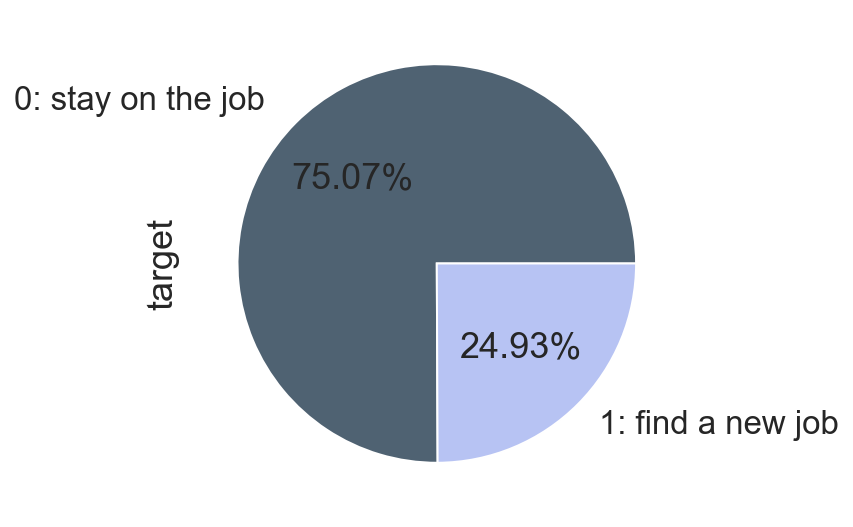

In [24]:
# Show pie plot (Approach 1)
# y.hist()
colors = ['#4F6272', '#B7C3F3']
labels = ("0: stay on the job ", "1: find a new job")
y.value_counts().plot.pie(labels =labels, labeldistance=1.15, autopct=lambda p:f'{p:.2f}%', colors=colors)
plt.title('', fontsize=20)
plt.tight_layout()
plt.show()

### Split into features and target -- with and without scaling

In [25]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (15326, 42)
X_test: (3832, 42)
y_train: (15326,)
y_test: (3832,)


In [26]:
X.training_hours = X.training_hours.astype('int32')

### Random Undersampling for handle imbalanced datasets 
#### resample all classes but the minority class

In [27]:
# !conda install -c conda-forge imbalanced-learn
#! pip install -U imbalanced-learn

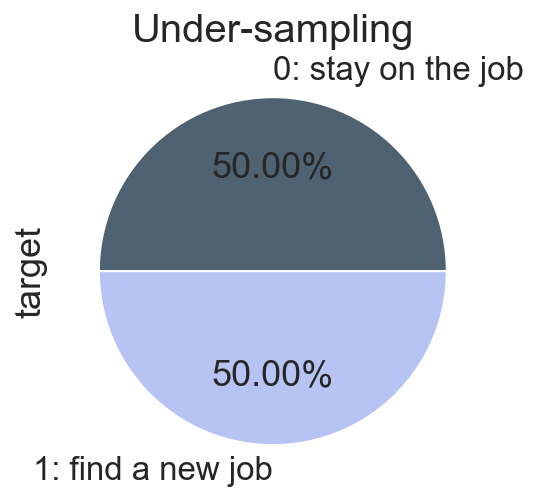

In [28]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler( random_state=42) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_rus, y_rus = rus.fit_resample(X_train.values, y_train)

# X_res, y_res = rus.fit_resample(X_train.as_matrix(), y_train.ravel())
#                               X_train.values
ax = y_rus.value_counts().plot.pie(labels = labels, labeldistance=1.15, autopct=lambda p:f'{p:.2f}%', colors=colors)
_ = ax.set_title("Under-sampling", fontsize=20)

In [29]:
# Class distribution
y_rus.value_counts()

0    3825
1    3825
Name: target, dtype: int64

### Random Oversampling for handle imbalanced datasets
### resample all classes but the majority class

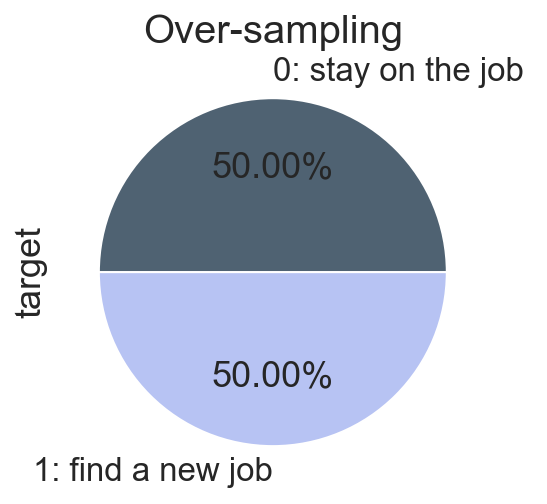

In [30]:
import imblearn.over_sampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1) # Float
# ros = RandomOverSampler(sampling_strategy="not majority") # String
X_ros, y_ros = ros.fit_resample(X_train.values, y_train)

ax = y_ros.value_counts().plot.pie(labels = labels, labeldistance=1.15, autopct=lambda p:f'{p:.2f}%', colors=colors)
_ = ax.set_title("Over-sampling", fontsize=20)

In [31]:
# Class distribution
y_ros.value_counts()

1    11501
0    11501
Name: target, dtype: int64

### SMOTE for handle imbalanced datasets

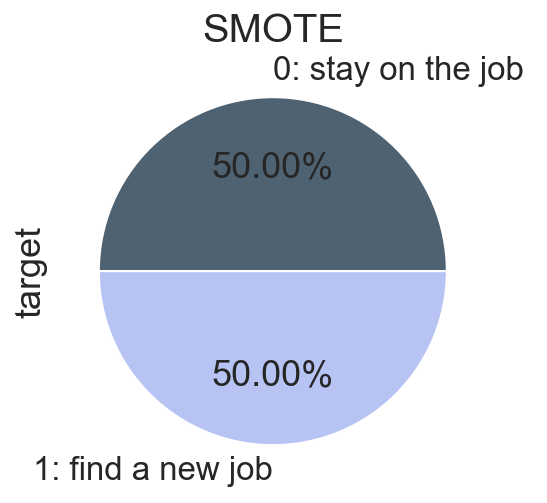

In [32]:
from imblearn.over_sampling import SMOTE
#from imblearn import under_sampling, over_sampling
# setup for the ratio argument of RandomOverSampler initialization
smote = imblearn.over_sampling.SMOTE(sampling_strategy='minority', random_state = 42)   
X_tr_smote, y_tr_smote = smote.fit_resample(X_train.values, y_train)

ax = y_tr_smote.value_counts().plot.pie(labels = labels, labeldistance=1.15, autopct=lambda p:f'{p:.2f}%', colors=colors)
_ = ax.set_title("SMOTE", fontsize=20)

In [33]:
# Class distribution
y_tr_smote.value_counts()

1    11501
0    11501
Name: target, dtype: int64

## Classification Algorithms 

- After obtaining a balanced data set through Undersampling, Oversampling, SMOTE, a selection will be made between them based on the best results for the model. 

In [34]:
# Expr1: with all the data (dummy included)

# Undersampling
lr_Regress_model = LogisticRegression(max_iter=500, solver='liblinear')
lr_Regress_model.fit(X_rus, y_rus)

print("The score for Logistic Regression after Undersampling:")
print("Training: {:6.2f}%".format(100*lr_Regress_model.score(X_rus, y_rus)))
print("Test set: {:6.2f}%".format(100*lr_Regress_model.score(X_test, y_test)))
model_eval(lr_Regress_model, X_test, y_test)

print("---------------------------------------------------")
print("---------------------------------------------------")
# Oversampling
lr_Regress_model = LogisticRegression(max_iter=500, solver='liblinear')
lr_Regress_model.fit(X_ros, y_ros)

print("The score for Logistic Regression after Oversampling:")
print("Training: {:6.2f}%".format(100*lr_Regress_model.score(X_ros, y_ros)))
print("Test set: {:6.2f}%".format(100*lr_Regress_model.score(X_test, y_test)))
model_eval(lr_Regress_model, X_test, y_test)

print("---------------------------------------------------")
print("---------------------------------------------------")
 # SMOTE
lr_Regress_model = LogisticRegression(max_iter=500, solver='liblinear')
lr_Regress_model.fit(X_tr_smote, y_tr_smote)

print("The score for Logistic Regression after SMOTE:")
print("Training: {:6.2f}%".format(100*lr_Regress_model.score(X_tr_smote, y_tr_smote)))
print("Test set: {:6.2f}%".format(100*lr_Regress_model.score(X_test, y_test)))
model_eval(lr_Regress_model, X_test, y_test)

The score for Logistic Regression after Undersampling:
Training:  64.90%
Test set:  63.73%
F(1): 0.4553291536050157
Precision : 0.363125
Recall : 0.6102941176470589
---------------------------------------------------
---------------------------------------------------


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


The score for Logistic Regression after Oversampling:
Training:  64.55%
Test set:  64.35%
F(1): 0.46093133385951063
Precision : 0.3691529709228824
Recall : 0.6134453781512605
---------------------------------------------------
---------------------------------------------------


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


The score for Logistic Regression after SMOTE:
Training:  80.61%
Test set:  73.64%
F(1): 0.32666666666666666
Precision : 0.4470802919708029
Recall : 0.25735294117647056


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


### SMOTE will be selected

### Logistic Regression Classifier

In [35]:
# Here only numeric columns are taken fit fot model (Expr0)
lr_Regress_model = LogisticRegression()
lr_Regress_model.fit(X_train[my_list_numeric].fillna(0), y_train)

print("The score for Logistic Regression is only numeric columns:" + END)
print("Training: {:6.2f}%".format(100*lr_Regress_model.score(X_train[my_list_numeric].fillna(0), y_train)))
print("Test set: {:6.2f}%".format(100*lr_Regress_model.score(X_test[my_list_numeric].fillna(0), y_test)))
model_eval(lr_Regress_model, X_test[my_list_numeric].fillna(0), y_test)

The score for Logistic Regression is only numeric columns:
Training:  75.04%
Test set:  75.16%
F(1): 0.0
Precision : 0.0
Recall : 0.0


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
# Expr2: with scaling (standard scaler or minmax scaler)
def basic_classifiers (X_tr_smote, X_test, y_tr_smote, y_test): # X_tr_smote, y_tr_smote
    kfold = 5
    # Scaling  
ss = StandardScaler()
X_train_std = ss.fit_transform(X_tr_smote)
X_test_std = ss.transform(X_test)
    
# Modeling
lr_Regress_model = LogisticRegression()
lr_Regress_model.fit(X_train_std, y_tr_smote)

print("The score for Logistic Regression with standard scaler:"+ END)
print("Training: {:6.2f}%".format(100*lr_Regress_model.score(X_train_std, y_tr_smote)))
print("Test set: {:6.2f}%".format(100*lr_Regress_model.score(X_test_std, y_test)))
model_eval(lr_Regress_model, X_test_std, y_test)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


The score for Logistic Regression with standard scaler:
Training:  80.57%
Test set:  73.80%
F(1): 0.3243606998654105
Precision : 0.45131086142322097
Recall : 0.25315126050420167


In [37]:
# Expr2: with scaling (standard scaler or minmax scaler) # X_tr_smote, y_tr_smote
mm = MinMaxScaler()

X_train_mm = mm.fit_transform(X_tr_smote)
X_test_mm = mm.transform(X_test)

# Modeling
lr_Regress_model = LogisticRegression(solver='liblinear')
lr_Regress_model.fit(X_train_mm, y_tr_smote)

print("The score for Logistic Regression with standard scaler:"+ END)
print("Training: {:6.2f}%".format(100*lr_Regress_model.score(X_train_mm, y_tr_smote)))
print("Test set: {:6.2f}%".format(100*lr_Regress_model.score(X_test_mm, y_test)))
model_eval(lr_Regress_model, X_test_mm, y_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


The score for Logistic Regression with standard scaler:
Training:  80.60%
Test set:  73.62%
F(1): 0.3264490339773484
Precision : 0.44626593806921677
Recall : 0.25735294117647056


In [39]:
# Expr3: with Grid search # X_tr_smote, y_tr_smote
lr_Regress_model = LogisticRegression()
parms = {"penalty":['l2','l1'],"C" : np.arange(0.1,3,0.2),"fit_intercept":[True, False]}

custom_scorer = make_scorer(fbeta_score, beta=1)

gs_cv = GridSearchCV(lr_Regress_model, param_grid = parms, n_jobs=-1, cv=10, verbose=10, scoring=custom_scorer)
gs_cv.fit(X_train_std, y_tr_smote)

# examine the best model
print( BOLD + "Results Logistic Regression with Grid search:" )
print("Best params: ", gs_cv.best_params_)
print("Best estimator: ", gs_cv.best_estimator_)
print("Best score: ", gs_cv.best_score_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError:

Results Logistic Regression with Grid search:
Best params:  {'C': 0.1, 'fit_intercept': True, 'penalty': 'l2'}
Best estimator:  LogisticRegression(C=0.1)
Best score:  0.7296903538731749


In [40]:
best_modellr = gs_cv.best_estimator_

In [41]:
print( BOLD + "Results Logistic Regression after selecting the best estimator:" + END)
print("Training: {:6.2f}%".format(100*best_modellr.score(X_train_std, y_tr_smote)))
print("Test set: {:6.2f}%".format(100*best_modellr.score(X_test_std, y_test)))

Results Logistic Regression after selecting the best estimator:
Training:  80.62%
Test set:  73.72%


In [42]:
print( BOLD + "Results Logistic Regression after selecting the best estimator: F(1), Precision, Recall" + END)
model_eval(best_modellr, X_test_std, y_test, bta=1)

Results Logistic Regression after selecting the best estimator: F(1), Precision, Recall
F(1): 0.3237071860308932
Precision : 0.44878957169459965
Recall : 0.25315126050420167


In [43]:
lr_Regress_model = LogisticRegression(C= 0.1, fit_intercept= True, penalty= 'l2')
lr_Regress_model.fit(X_train_std, y_tr_smote)

print( BOLD + "Results Logistic Regression after selecting the best parameter:" + END)
print("Training: {:6.2f}%".format(100*lr_Regress_model.score(X_train_std, y_tr_smote)))
print("Test set: {:6.2f}%".format(100*lr_Regress_model.score(X_test_std, y_test)))

Results Logistic Regression after selecting the best parameter:
Training:  80.62%
Test set:  73.72%


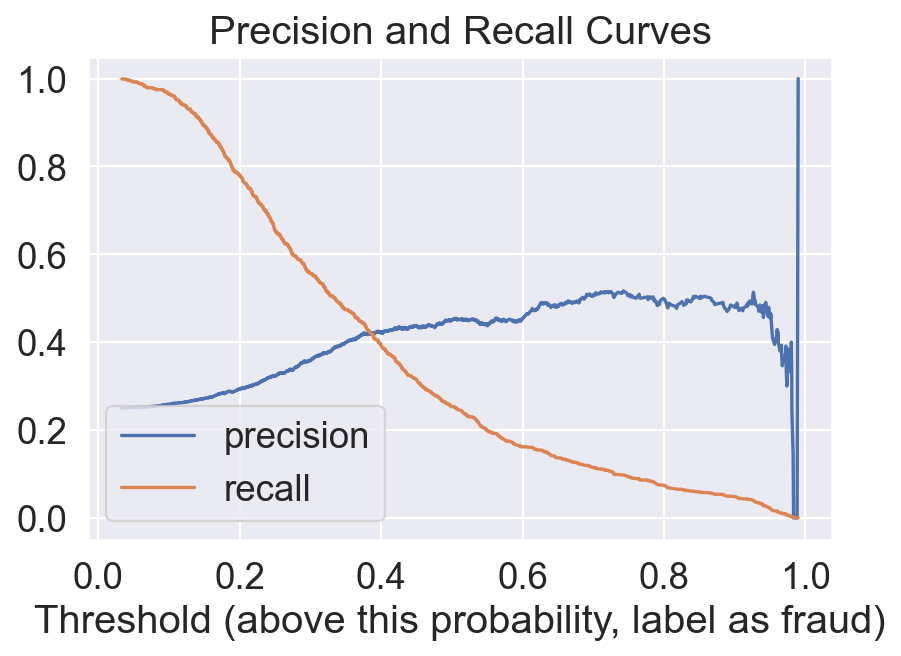

In [44]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, best_modellr.predict_proba(X_test_std)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

In [45]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(best_modellr,X_test_std, y_test, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [46]:
interactive(lambda threshold: make_class_report(best_modellr,X_test_std, y_test, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

### Decision Tree Algorithm 

In [47]:
# 2) Model your data with Decision Tree. Get the train and test scores. Is your model overfitting?
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_tr_smote,y_tr_smote)
predict = dec_tree.predict(X_test)
print( BOLD + "The score for Decision Tree Classifier is:" + END)
print("Training: {:6.2f}%".format(100*dec_tree.score(X_tr_smote,y_tr_smote)) )
print("Test set: {:6.2f}%".format(100*dec_tree.score(X_test, y_test)) )
model_eval(dec_tree, X_test, y_test)

The score for Decision Tree Classifier is:
Training:  99.51%
Test set:  65.84%
F(1): 0.3757749165474487
Precision : 0.3441048034934498
Recall : 0.41386554621848737


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [48]:
# standard scaler
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train_std, y_tr_smote)

print(BOLD + "The score for Decision Tree Classifier with standard scaler:" + END)
print("Training: {:6.2f}%".format(100*dec_tree.score(X_train_std, y_tr_smote)))
print("Test set: {:6.2f}%".format(100*dec_tree.score(X_test_std, y_test)))
model_eval(dec_tree, X_test_std, y_test)

The score for Decision Tree Classifier with standard scaler:
Training:  99.51%
Test set:  66.13%
F(1): 0.38190476190476197
Precision : 0.34930313588850176
Recall : 0.421218487394958


In [49]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[('dec_tree', dec_tree)])

In [50]:
# Expr 1:for Decision Tree with grid search
tree_parms = {
    'max_depth' : [3, 5, 7, 8, 11, 12],
    'min_samples_split' : [2, 3, 5, 9], 
    'criterion' :['gini', 'entropy']
}

dt_gs_cv = GridSearchCV(dec_tree, tree_parms, n_jobs=-1) # n_jobs=-1, verbose=1, cv=3
dt_gs_cv.fit(X_tr_smote, y_tr_smote)

# examine the best model
print(BOLD + "Results Decision Tree with Grid search:" + END)
print("Best params: ", dt_gs_cv.best_params_)
print("Best estimator: ", dt_gs_cv.best_estimator_)
print("Best score: ", dt_gs_cv.best_score_)

Results Decision Tree with Grid search:
Best params:  {'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 9}
Best estimator:  DecisionTreeClassifier(max_depth=12, min_samples_split=9)
Best score:  0.7691588312559652


In [51]:
best_model_DT1 = dt_gs_cv.best_estimator_ 

In [52]:
print(BOLD + "Results Decision Tree after selecting the best estimator:" + END)
print("Training: {:6.2f}%".format(100*best_model_DT1.score(X_train_std, y_tr_smote)))
print("Testing: {:6.2f}%".format(100*best_model_DT1.score(X_test_std, y_test)))

Results Decision Tree after selecting the best estimator:
Training:  63.93%
Testing:  70.69%


In [53]:
print(BOLD + "Results Decision Tree after selecting the best estimator: F(1), Precision, Recall" + END)
model_eval(best_model_DT1, X_test_std, y_test, bta=1)

Results Decision Tree after selecting the best estimator: F(1), Precision, Recall
F(1): 0.3063619518221124
Precision : 0.37181409295352325
Recall : 0.2605042016806723


In [54]:
# == final_dt_model = dt_gs_cv.best_estimator_ 
dec_tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 12, min_samples_split = 9)
dec_tree.fit(X_train_std, y_tr_smote)

print(BOLD + "Results Decision Tree after selecting the best parameter:" + END)
print("Training: {:6.2f}%".format(100* dec_tree.score(X_train_std, y_tr_smote)))
print("Testing: {:6.2f}%".format(100*dec_tree.score(X_test_std, y_test)))
model_eval(dec_tree, X_test_std, y_test)

Results Decision Tree after selecting the best parameter:
Training:  83.38%
Testing:  68.89%
F(1): 0.43075453677172876
Precision : 0.3949211908931699
Recall : 0.4737394957983193


### Random Forest Algorithm 

In [55]:
RFC =RandomForestClassifier(random_state=42)
RFC.fit(X_tr_smote,y_tr_smote)
#RFC_predict = RFC.predict(x_test)
print(BOLD + "The score for Random Forest Classifier is:"+ END)
print("Training: {:6.2f}%".format(100*RFC.score(X_tr_smote, y_tr_smote)))
print("Test set: {:6.2f}%".format(100*RFC.score(X_test, y_test)))
model_eval(RFC, X_test, y_test)

The score for Random Forest Classifier is:
Training:  99.51%


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Test set:  72.31%


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


F(1): 0.41990158556588303
Precision : 0.4378563283922463
Recall : 0.40336134453781514


In [56]:
# standard scaler
RFC =RandomForestClassifier(random_state=42)
RFC.fit(X_train_std, y_tr_smote)
print(BOLD + "The score for Random Forest Classifier with standard scaler:"+ END)
print("Training: {:6.2f}%".format(100*RFC.score(X_train_std, y_tr_smote)))
print("Test set: {:6.2f}%".format(100*RFC.score(X_test_std, y_test)))
model_eval(RFC, X_test_std, y_test)

The score for Random Forest Classifier with standard scaler:
Training:  99.51%
Test set:  72.13%
F(1): 0.41511500547645125
Precision : 0.43363844393592677
Recall : 0.39810924369747897


In [57]:
# Random Forest with Grid Search
RFC =RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [10, 20, 40, 50, 70],
    'max_depth':[3, 5, 7, 8, 11, 12], 
    'criterion' : ['gini', 'entropy'], 
    'min_samples_split' : [2, 3, 5, 9], 
    'max_features' : ['auto', 'sqrt', 'log2']
}

rfc_gscv = GridSearchCV(estimator= RFC, param_grid = param_grid, cv=5, n_jobs=-1) # verbose=True, verbose=1
rfc_gscv.fit(X_tr_smote, y_tr_smote)

# examine the best model
print(BOLD+ "Results RandomForest with Grid search:"+ END)
print("Best params: ", rfc_gscv.best_params_)
print("Best estimator: ", rfc_gscv.best_estimator_)
print("Best score: ", rfc_gscv.best_score_)

Results RandomForest with Grid search:
Best params:  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'min_samples_split': 9, 'n_estimators': 40}
Best estimator:  RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_split=9,
                       n_estimators=40, random_state=42)
Best score:  0.7857223760430152


In [60]:
best_model_RFC =rfc_gscv.best_estimator_ 

In [61]:
print(BOLD + "Results RandomForest after selecting the best estimator:" + END)
print("Training: {:6.2f}%".format(100*best_model_RFC.score(X_train_std, y_tr_smote)))
print("Test set: {:6.2f}%".format(100*best_model_RFC.score(X_test_std, y_test)))

Results RandomForest after selecting the best estimator:
Training:  74.94%
Test set:  66.75%


In [62]:
print(BOLD + "Results RandomForest after selecting the best estimator: F(1), Precision, Recall" + END)
model_eval(best_model_RFC, X_test_std, y_test, bta=1)

Results RandomForest after selecting the best estimator: F(1), Precision, Recall
F(1): 0.4029990627928773
Precision : 0.3637901861252115
Recall : 0.45168067226890757


In [63]:
RFC = RandomForestClassifier(criterion = 'entropy', max_depth= 12, max_features = 'auto', min_samples_split = 9,
                             n_estimators = 40)

RFC.fit(X_train_std, y_tr_smote)
print(BOLD + "Results Random Forest after selecting the best parameter:"+ END)
print("Training: {:6.2f}%".format(100*RFC.score(X_train_std, y_tr_smote)))
print("Testing: {:6.2f}%".format(100*RFC.score(X_test_std, y_test)))
model_eval(RFC, X_test_std, y_test)

Results Random Forest after selecting the best parameter:
Training:  81.72%
Testing:  73.33%
F(1): 0.49655172413793097
Precision : 0.4675324675324675
Recall : 0.5294117647058824


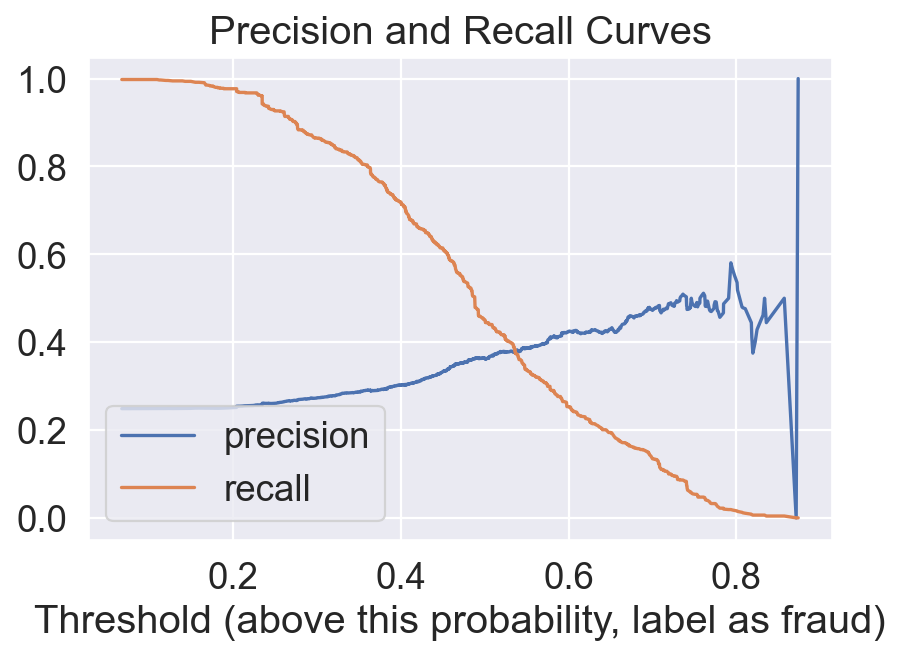

In [64]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, best_model_RFC.predict_proba(X_test_std)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

In [65]:
interactive(lambda threshold: make_confusion_matrix(best_model_RFC,X_test_std, y_test, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [66]:
interactive(lambda threshold: make_class_report(best_model_RFC,X_test_std, y_test, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

### K-Nearest Neighbor(KNN) Algorithm 

In [67]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_tr_smote, y_tr_smote)
y_pred = knn.predict(X_test)
print(BOLD + "The score for kNN is:"+ END)
print("Training: {:6.2f}%".format(100*knn.score(X_tr_smote, y_tr_smote)))
print("Test set: {:6.2f}%".format(100*knn.score(X_test, y_test)))
model_eval(knn, X_test, y_test)
# print("accuracy:", metrics.accuracy_score(y_test, y_pred))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


The score for kNN is:
Training:  81.87%


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Test set:  59.24%


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


F(1): 0.4381294964028777
Precision : 0.33315098468271337
Recall : 0.6397058823529411


In [68]:
# standard scaler
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_tr_smote)
y_pred = knn.predict(X_test)
print(BOLD + "The score for kNN is with standard scaler:"+ END)
print("Training: {:6.2f}%".format(100*knn.score(X_train_std, y_tr_smote)))
print("Test set: {:6.2f}%".format(100*knn.score(X_test_std, y_test)))
model_eval(knn, X_test_std, y_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


The score for kNN is with standard scaler:
Training:  85.12%
Test set:  70.80%
F(1): 0.35130434782608694
Precision : 0.39197930142302717
Recall : 0.3182773109243697


In [ ]:
# KNN with Grid Search
knn = KNeighborsClassifier(n_neighbors=5)

parameters_KNN = {
    'n_neighbors':[1,10,1],
    'leaf_size': [20,40,1],
    'p': [1,2], 'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'chebyshev']
}
grid_search_KNN = GridSearchCV( estimator= knn, param_grid=parameters_KNN, n_jobs = -1, cv = 5) #scoring='accuracy'
grid_search_KNN.fit(X_train_std, y_tr_smote)

In [73]:
# examine the best model
print(BOLD+ "Results KNeighbors with Grid search:"+ END)
print("Best params: ", grid_search_KNN.best_params_)
print("Best estimator: ", grid_search_KNN.best_estimator_ )
print("Best score: ", grid_search_KNN.best_score_)

Results KNeighbors with Grid search:
Best params:  {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
Best estimator:  KNeighborsClassifier(leaf_size=20, n_neighbors=10, p=1)
Best score:  0.7986410610169812


In [74]:
best_model_KNN = grid_search_KNN.best_estimator_ 

In [122]:
print("Results KNeighbors after selecting the best estimator:"+ END)
print("Training: {:6.2f}%".format(100*best_model_KNN.score(X_train_std, y_tr_smote)))
print("Testing: {:6.2f}%".format(100*best_model_KNN.score(X_test_std, y_test)))

Results KNeighbors after selecting the best estimator:
Training:  83.56%
Testing:  73.12%


In [123]:
print("Results KNeighbors after selecting the best estimator: F(1), Precision, Recall "+ END)
model_eval(best_model_KNN, X_test_std, y_test, bta=1)

Results KNeighbors after selecting the best estimator: F(1), Precision, Recall 
F(1): 0.3205804749340369
Precision : 0.4308510638297872
Recall : 0.2552521008403361


In [77]:
knn = KNeighborsClassifier(leaf_size = 20,  metric = 'minkowski', n_neighbors= 10, p= 1, weights = 'uniform')
knn.fit(X_train_std, y_tr_smote)

print("Results KNeighbors after selecting the best parameter:"+ END)
print("Training: {:6.2f}%".format(100*knn.score(X_train_std, y_tr_smote)))
print("Testing: {:6.2f}%".format(100*knn.score(X_test_std, y_test)))
model_eval(knn, X_test_std, y_test)

Results KNeighbors after selecting the best parameter:
Training:  83.56%
Testing:  73.12%
F(1): 0.3205804749340369
Precision : 0.4308510638297872
Recall : 0.2552521008403361


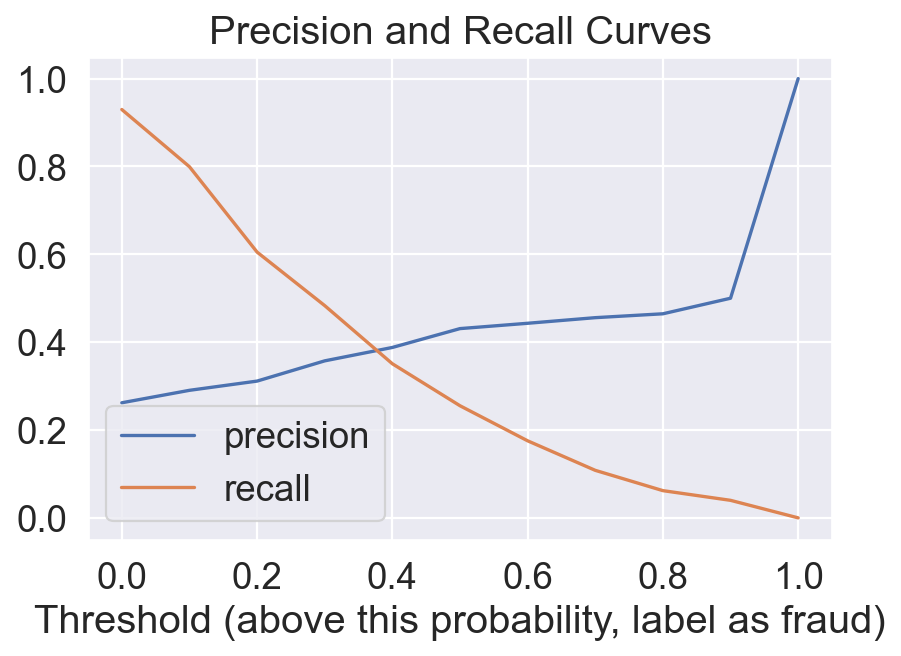

In [80]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, best_model_KNN.predict_proba(X_test_std)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

In [81]:
interactive(lambda threshold: make_confusion_matrix(best_model_KNN,X_test_std, y_test, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [82]:
interactive(lambda threshold: make_class_report(best_model_KNN,X_test_std, y_test, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

### Voting classifier 

In [38]:
#model_vars = [eval(n) for n in models]
#model_list = list(zip(models, model_vars))
##################################################### 
model_names = ['best_modellr', 'best_model_DT1', 'best_model_RFC','best_model_KNN']
model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))

NameError: name 'best_modellr' is not defined

In [143]:
# Get peek at individual test scores

print(f' Logreg Test score: {best_modellr.score(X_test_std, y_test)}')
print(f' Decision Tree Test score: {best_model_DT1.score(X_test_std, y_test)}')
print(f' Random forest Test score: {best_model_RFC.score(X_test_std, y_test)}')
print(f' KNN Test score: {best_model_KNN.score(X_test_std, y_test)}')

 Logreg Test score: 0.7372129436325678
 Decision Tree Test score: 0.7184237995824635
 Random forest Test score: 0.6675365344467641
 KNN Test score: 0.7312108559498957


In [1]:
from sklearn.ensemble import VotingClassifier

# create voting classifier
votCfer = VotingClassifier(estimators=['best_modellr', 'best_model_DT1', 'best_model_RFC','best_model_KNN'],
                           voting='soft',
                           n_jobs=-1)
votCfer = votCfer.fit(X_train_std, y_tr_smote)

NameError: name 'X_train_std' is not defined

In [ ]:
# Get accuracy (model to beat: logreg with 0.8324 accuracy)
y_pred = voting_classifer.predict(X_test)
accuracy_score(y_test, y_pred)

### Staking 

In [149]:
from sklearn.ensemble import StackingClassifier
#Staking 
stacked = StackingClassifier(
    classifiers=model_vars, meta_classifier=LogisticRegression(), use_probas=False)

TypeError: __init__() got an unexpected keyword argument 'classifiers'

In [ ]:
y_pred = stacked.predict(X_test)
accuracy_score(y_test, y_pred)